In [1]:
!pip install surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357280 sha256=ca2da444e642cc5df2234f778a681094b9c2d6f8c199a565b358b124beb7e141
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
import pandas as pd
import numpy as np
from surprise import accuracy, SVD, NMF, SVDpp, Dataset
from surprise.model_selection import train_test_split, cross_validate

In [4]:
data = Dataset.load_builtin(name = 'ml-100k', prompt=True)
data

In [5]:
algorithms = [SVD(), SVDpp(), NMF()]

# SVD алгоритм

In [6]:
SVD_result = cross_validate(algorithms[0], data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
SVD_result = pd.DataFrame.from_dict(SVD_result).mean(axis=0)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9352  0.9353  0.9280  0.9379  0.9423  0.9358  0.0046  
MAE (testset)     0.7376  0.7368  0.7322  0.7371  0.7435  0.7374  0.0036  
Fit time          1.44    1.43    1.44    1.48    1.60    1.48    0.06    
Test time         0.16    0.26    0.14    0.22    0.22    0.20    0.04    


# SVDpp алгоритм

In [7]:
SVDpp_result = cross_validate(algorithms[1], data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
SVDpp_result = pd.DataFrame.from_dict(SVDpp_result).mean(axis=0)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9196  0.9290  0.9102  0.9251  0.9097  0.9187  0.0078  
MAE (testset)     0.7222  0.7254  0.7123  0.7279  0.7123  0.7200  0.0066  
Fit time          28.52   27.52   27.60   27.13   27.30   27.61   0.48    
Test time         4.59    5.21    4.58    5.52    4.58    4.89    0.40    


# NMF алгоритм

In [8]:
NMF_result = cross_validate(algorithms[2], data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
NMF_result = pd.DataFrame.from_dict(NMF_result).mean(axis=0)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9564  0.9553  0.9642  0.9639  0.9639  0.9607  0.0040  
MAE (testset)     0.7506  0.7537  0.7552  0.7591  0.7566  0.7550  0.0028  
Fit time          2.31    2.35    2.62    2.67    2.31    2.45    0.16    
Test time         0.11    0.12    0.34    0.12    0.23    0.18    0.09    


 Створимо DataFrame для зберігання результатів трьох різних алгоритмів (SVD, SVDpp, NMF) і заповнимо його середніми значеннями метрик для кожного з них.

In [9]:
algorithms_result = pd.DataFrame(columns=['SVD', 'SVDpp', 'NMF'])
algorithms_result['SVD'] = SVD_result
algorithms_result['SVDpp'] = SVDpp_result
algorithms_result['NMF'] = NMF_result
algorithms_result

,SVD,SVDpp,NMF
test_rmse,0.935753,0.918696,0.960735
test_mae,0.737431,0.720014,0.755028
fit_time,1.479430,27.612009,2.450104
test_time,0.198133,4.894731,0.182528


Подивимось на графіки і зробимо висновки

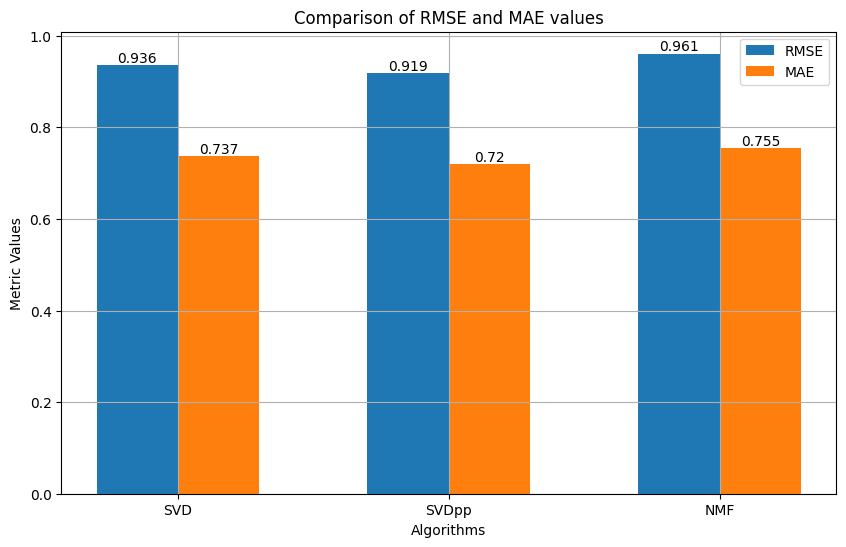

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Настройка фигуры
plt.figure(figsize=(10, 6))

# Подготовка данных для графика
x = np.arange(len(algorithms_result.columns))  # Создаём массив значений для оси X

# Построение столбчатых диаграмм для RMSE и MAE
plt.bar(x - 0.15, algorithms_result.iloc[0], width=0.3, label='RMSE')
plt.bar(x + 0.15, algorithms_result.iloc[1], width=0.3, label='MAE')

# Добавление текстовых меток на столбцы
for index, value in enumerate(algorithms_result.iloc[0]):
    plt.text(index - 0.15, value, str(round(value, 3)), ha='center', va='bottom')

for index, value in enumerate(algorithms_result.iloc[1]):
    plt.text(index + 0.15, value, str(round(value, 3)), ha='center', va='bottom')

# Добавление сетки, легенды и заголовка
plt.grid(True)
plt.legend()

# Добавление меток для оси X
plt.xticks(x, algorithms_result.columns)

plt.title('Comparison of RMSE and MAE values')
plt.xlabel('Algorithms')
plt.ylabel('Metric Values')
plt.show()


In [11]:
train_data, test_data = train_test_split(data, test_size=0.25)

svd_train = algorithms[0].fit(train_data)
svdpp_train = algorithms[1].fit(train_data)
nmf_train = algorithms[2].fit(train_data)

In [12]:
svd_predict = svd_train.test(test_data)
svdpp_predict = svdpp_train.test(test_data)
nmf_predict = nmf_train.test(test_data)

In [13]:
svd_rmse = accuracy.rmse(svd_predict)
svdpp_rmse = accuracy.rmse(svdpp_predict)
nmf_rmse = accuracy.rmse(nmf_predict)
print(f'SVD RMSE: {svd_rmse}')
print(f'SVDpp RMSE: {svdpp_rmse}')
print(f'NMF RMSE: {nmf_rmse}')

RMSE: 0.9369
RMSE: 0.9200
RMSE: 0.9651
SVD RMSE: 0.9368751556297655
SVDpp RMSE: 0.9199886670795409
NMF RMSE: 0.9651355375028489


Як можна побачити з отриманих результатів алгоритм NMF показує кращу ефективність порівняно з SVD і SVDpp з бібліотеки surprise для даного датасету movielens